In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" EXPLORATION DES DONNÉES DÉPARTEMENTALES SURSAUD")
print("=" * 60)

🔍 EXPLORATION DES DONNÉES DÉPARTEMENTALES SURSAUD


In [4]:
# Cell 1: Chargement des données
print("Chargement des données départementales...")

df = pd.read_csv("../../data/cleaned/sursaud_departement_cleaned.csv")
df['date_debut_semaine'] = pd.to_datetime(df['date_debut_semaine'])

print(f"✅ Données chargées : {df.shape}")
print(f" Période : {df['date_debut_semaine'].min()} à {df['date_debut_semaine'].max()}")

Chargement des données départementales...
✅ Données chargées : (157040, 15)
 Période : 2019-12-30 00:00:00 à 2025-10-06 00:00:00


In [7]:
# Cell 2: Vue d'ensemble des données
print("\n📊 VUE D'ENSEMBLE")
print("=" * 25)

print(f" Dimensions : {df.shape[0]:,} observations × {df.shape[1]} colonnes")
print(f" Départements : {df['departement'].nunique()}")
print(f" Régions : {df['region'].nunique()}")
print(f" Classes d'âge : {df['classe_age'].nunique()}")
print(f"   Années : {df['annee'].min()} - {df['annee'].max()}")

print(f"\n Classes d'âge disponibles :")
for age in sorted(df['classe_age'].unique()):
    count = len(df[df['classe_age'] == age])
    print(f"   - {age}: {count:,} observations")

print(f"\nRégions disponibles :")
for region in sorted(df['region'].unique()):
    count = len(df[df['region'] == region])
    print(f"   - {region}: {count:,} observations")


📊 VUE D'ENSEMBLE
 Dimensions : 157,040 observations × 15 colonnes
 Départements : 104
 Régions : 21
 Classes d'âge : 5
   Années : 2019 - 2025

 Classes d'âge disponibles :
   - 00-04 ans: 31,408 observations
   - 05-14 ans: 31,408 observations
   - 15-64 ans: 31,408 observations
   - 65 ans ou plus: 31,408 observations
   - Tous âges: 31,408 observations

Régions disponibles :
   - Auvergne et Rhône-Alpes: 18,120 observations
   - Bourgogne et Franche-Comté: 12,080 observations
   - Bretagne: 6,040 observations
   - Centre-Val de Loire: 9,060 observations
   - Corse: 3,020 observations
   - Grand Est: 15,100 observations
   - Guadeloupe: 1,510 observations
   - Guyane: 1,510 observations
   - Hauts-de-France: 7,550 observations
   - Martinique: 1,510 observations
   - Mayotte: 1,510 observations
   - Miquelon-Langlade et Saint Pierre: 1,510 observations
   - Normandie: 7,550 observations
   - Nouvelle Aquitaine: 18,120 observations
   - Occitanie: 19,630 observations
   - Pays de la 


🔍 ANALYSE DES VALEURS MANQUANTES
Valeurs manquantes par colonne :
   ✅ date_debut_semaine: Aucune valeur manquante
   ✅ semaine: Aucune valeur manquante
   ✅ code_departement: Aucune valeur manquante
   ✅ departement: Aucune valeur manquante
   ✅ classe_age: Aucune valeur manquante
   ⚠️ taux_urgences_grippe: 5,422 (3.5%)
   ⚠️ taux_hospitalisations_grippe: 7,357 (4.7%)
   ✅ taux_sos_medecins_grippe: Aucune valeur manquante
   ✅ region: Aucune valeur manquante
   ✅ code_region: Aucune valeur manquante
   ✅ annee: Aucune valeur manquante
   ✅ mois: Aucune valeur manquante
   ✅ semaine_annee: Aucune valeur manquante
   ✅ jour_semaine: Aucune valeur manquante
   ✅ trimestre: Aucune valeur manquante


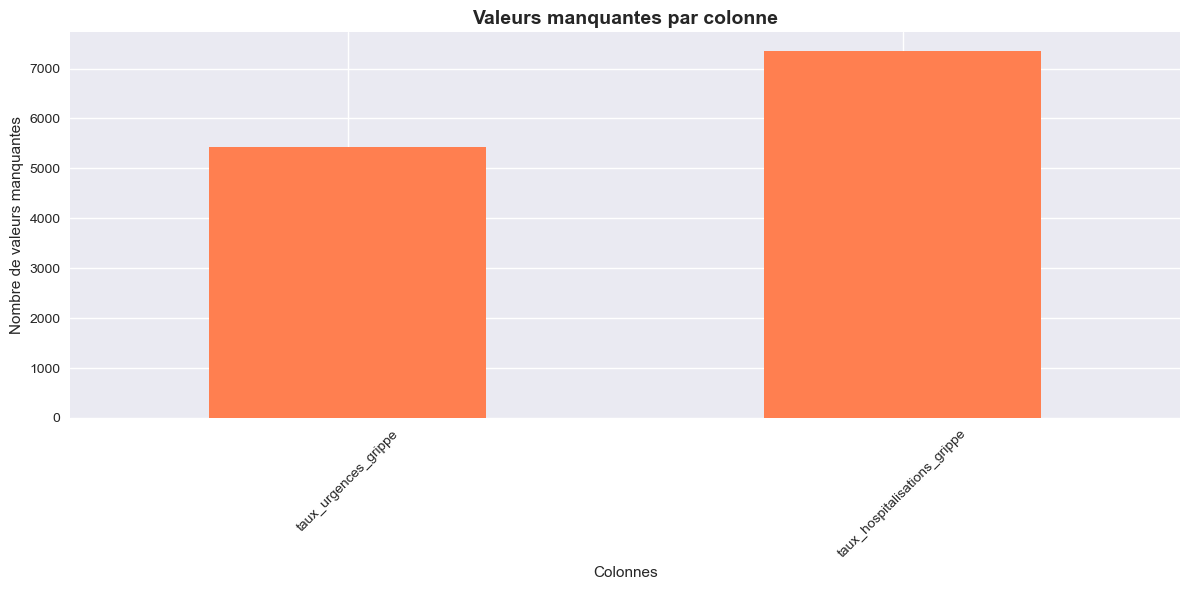

In [8]:
# Cell 3: Analyse des valeurs manquantes
print("\n🔍 ANALYSE DES VALEURS MANQUANTES")
print("=" * 40)

missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne :")
for col, missing in missing_data.items():
    if missing > 0:
        print(f"   ⚠️ {col}: {missing:,} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"   ✅ {col}: Aucune valeur manquante")

# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
missing_data[missing_data > 0].plot(kind='bar', color='coral')
plt.title('Valeurs manquantes par colonne', fontsize=14, fontweight='bold')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📊 STATISTIQUES DESCRIPTIVES
Statistiques des taux de grippe :


,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe
count,151618.000000,149683.000000,157040.000000
mean,657.284538,509.498379,1525.382818
std,1664.844144,1945.876379,4234.323151
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,56.785917,0.000000,0.000000
75%,447.093890,0.000000,680.272109
max,28865.979381,100000.000000,100000.000000


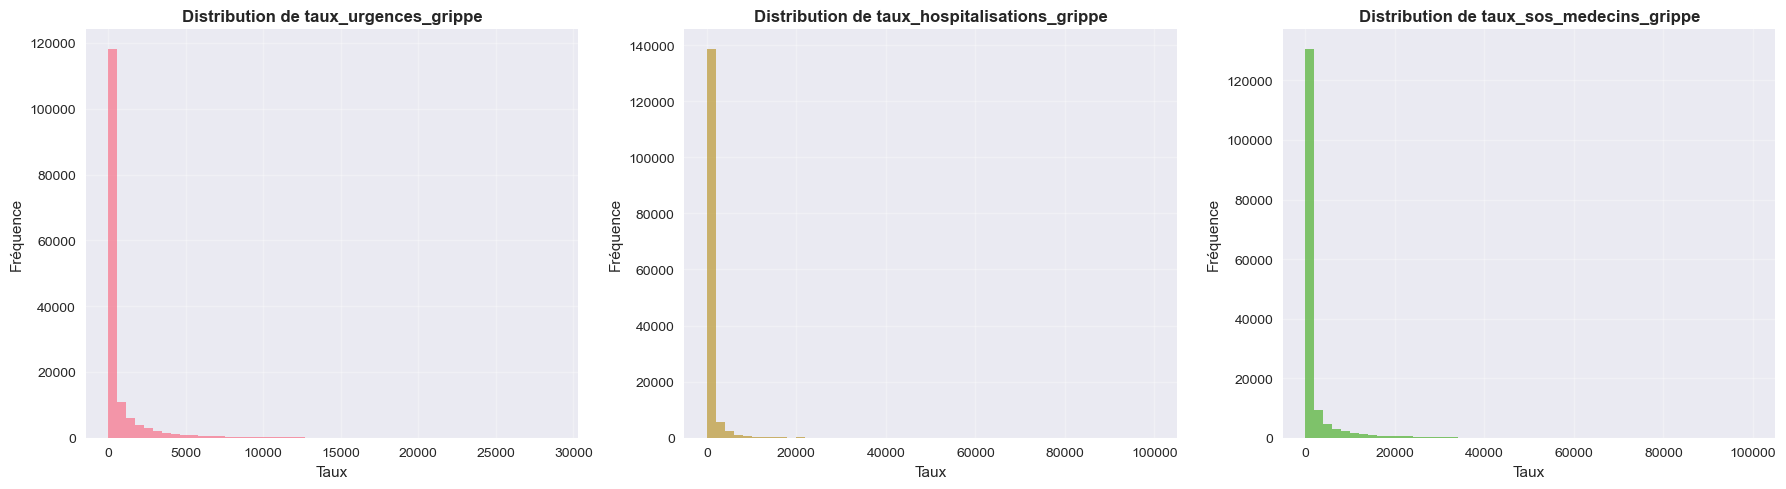

In [9]:
# Cell 4: Statistiques descriptives
print("\n📊 STATISTIQUES DESCRIPTIVES")
print("=" * 35)

# Statistiques pour les variables numériques
numeric_cols = ['taux_urgences_grippe', 'taux_hospitalisations_grippe', 'taux_sos_medecins_grippe']
print("Statistiques des taux de grippe :")
display(df[numeric_cols].describe())

# Analyse des distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, color=f'C{i}')
    axes[i].set_title(f'Distribution de {col}', fontweight='bold')
    axes[i].set_xlabel('Taux')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📅 ANALYSE TEMPORELLE
Évolution des taux par année :


taux_urgences_grippe                    taux_hospitalisations_grippe  \
                      mean      std       max                         mean   
annee                                                                        
2019                697.02   946.43   5979.38                       371.01   
2020                481.80  1373.26  19620.25                       327.50   
2021                103.14   416.72  10869.57                        67.54   
2022                884.62  1895.92  25000.00                       608.00   
2023                566.10  1142.93  22807.02                       416.84   
2024                856.60  1802.54  24137.93                       763.09   
2025               1156.78  2587.38  28865.98                       968.18   

                         taux_sos_medecins_grippe                      
           std       max                     mean      std        max  
annee                                                                  
2019   1036.98   10000.0                  1596.67  2621.96   16666.67  
2020   1589.03  100000.0                   987.72  3604.69   60975.61  
2021    597.41   25000.0                   198.19   746.99   26415.09  
2022   2072.79  100000.0                  2003.87  5079.36  100000.00  
2023   1583.60   50000.0                  1710.68  3658.75   42857.14  
2024   2309.99  100000.0                  2094.20  4556.64   46190.48  
2025   2859.88   50000.0                  2331.31  5919.77   51945.08

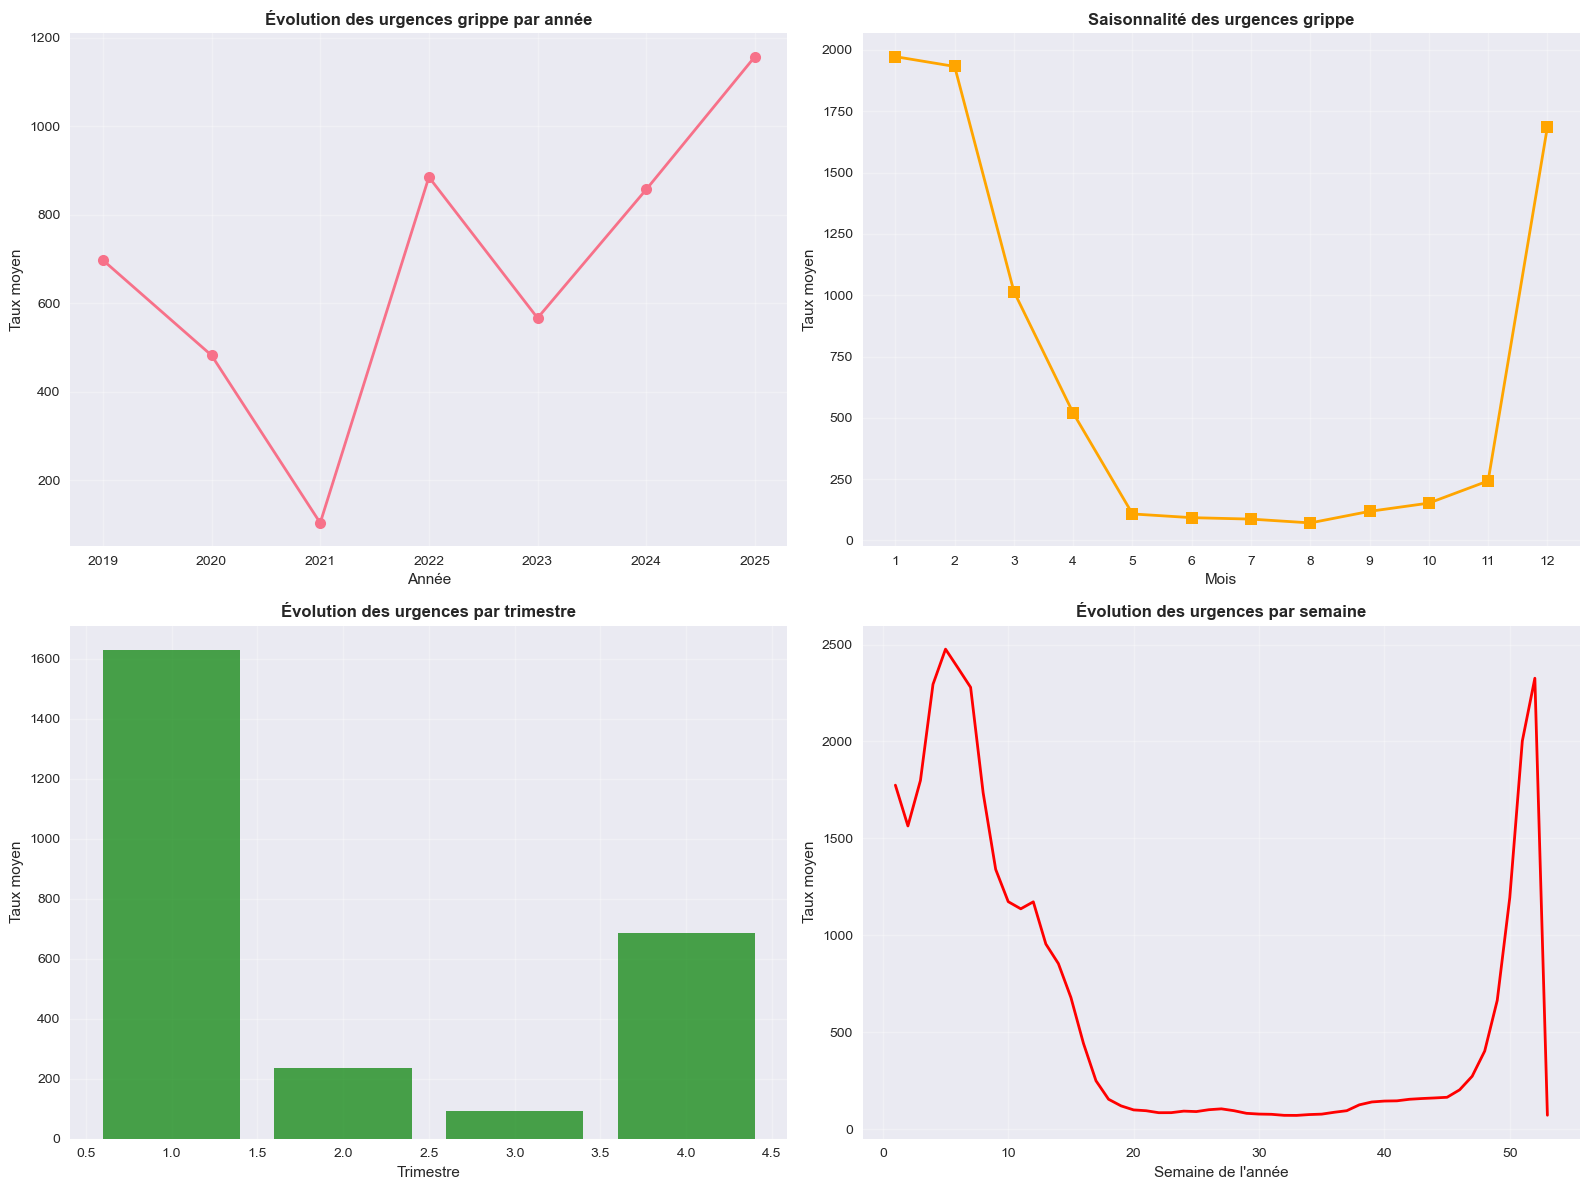

In [10]:
# Cell 5: Analyse temporelle
print("\n📅 ANALYSE TEMPORELLE")
print("=" * 25)

# Évolution des taux par année
yearly_stats = df.groupby('annee')[numeric_cols].agg(['mean', 'std', 'max']).round(2)
print("Évolution des taux par année :")
display(yearly_stats)

# Visualisation temporelle
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Évolution des urgences par année
yearly_urgences = df.groupby('annee')['taux_urgences_grippe'].mean()
axes[0, 0].plot(yearly_urgences.index, yearly_urgences.values, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Évolution des urgences grippe par année', fontweight='bold')
axes[0, 0].set_xlabel('Année')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Évolution par mois (saisonnalité)
monthly_urgences = df.groupby('mois')['taux_urgences_grippe'].mean()
axes[0, 1].plot(monthly_urgences.index, monthly_urgences.values, marker='s', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Saisonnalité des urgences grippe', fontweight='bold')
axes[0, 1].set_xlabel('Mois')
axes[0, 1].set_ylabel('Taux moyen')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# 3. Évolution par trimestre
quarterly_urgences = df.groupby('trimestre')['taux_urgences_grippe'].mean()
axes[1, 0].bar(quarterly_urgences.index, quarterly_urgences.values, color='green', alpha=0.7)
axes[1, 0].set_title('Évolution des urgences par trimestre', fontweight='bold')
axes[1, 0].set_xlabel('Trimestre')
axes[1, 0].set_ylabel('Taux moyen')
axes[1, 0].grid(True, alpha=0.3)

# 4. Évolution par semaine de l'année
weekly_urgences = df.groupby('semaine_annee')['taux_urgences_grippe'].mean()
axes[1, 1].plot(weekly_urgences.index, weekly_urgences.values, linewidth=2, color='red')
axes[1, 1].set_title('Évolution des urgences par semaine', fontweight='bold')
axes[1, 1].set_xlabel('Semaine de l\'année')
axes[1, 1].set_ylabel('Taux moyen')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🗺️ ANALYSE GÉOGRAPHIQUE
Top 10 départements par taux d'urgences moyen :
 1. Haute-Vienne: 1359.2
 2. Val-de-Marne: 1235.9
 3. Guyane: 1053.9
 4. Seine-Saint-Denis: 974.4
 5. Bouches-du-Rhône: 973.2
 6. Val-d'Oise: 933.4
 7. Alpes-de-Haute-Provence: 931.3
 8. Var: 928.7
 9. Alpes-Maritimes: 904.6
10. Haute-Savoie: 903.2

Top 10 régions par taux d'urgences moyen :
 1. Guyane: 1053.9
 2. Provence-Alpes-Côte d'Azur: 891.1
 3. Île-de-France: 854.2
 4. Corse: 825.9
 5. Hauts-de-France: 718.2
 6. Réunion: 685.4
 7. Grand Est: 679.5
 8. Auvergne et Rhône-Alpes: 676.1
 9. Normandie: 674.5
10. Bourgogne et Franche-Comté: 653.0


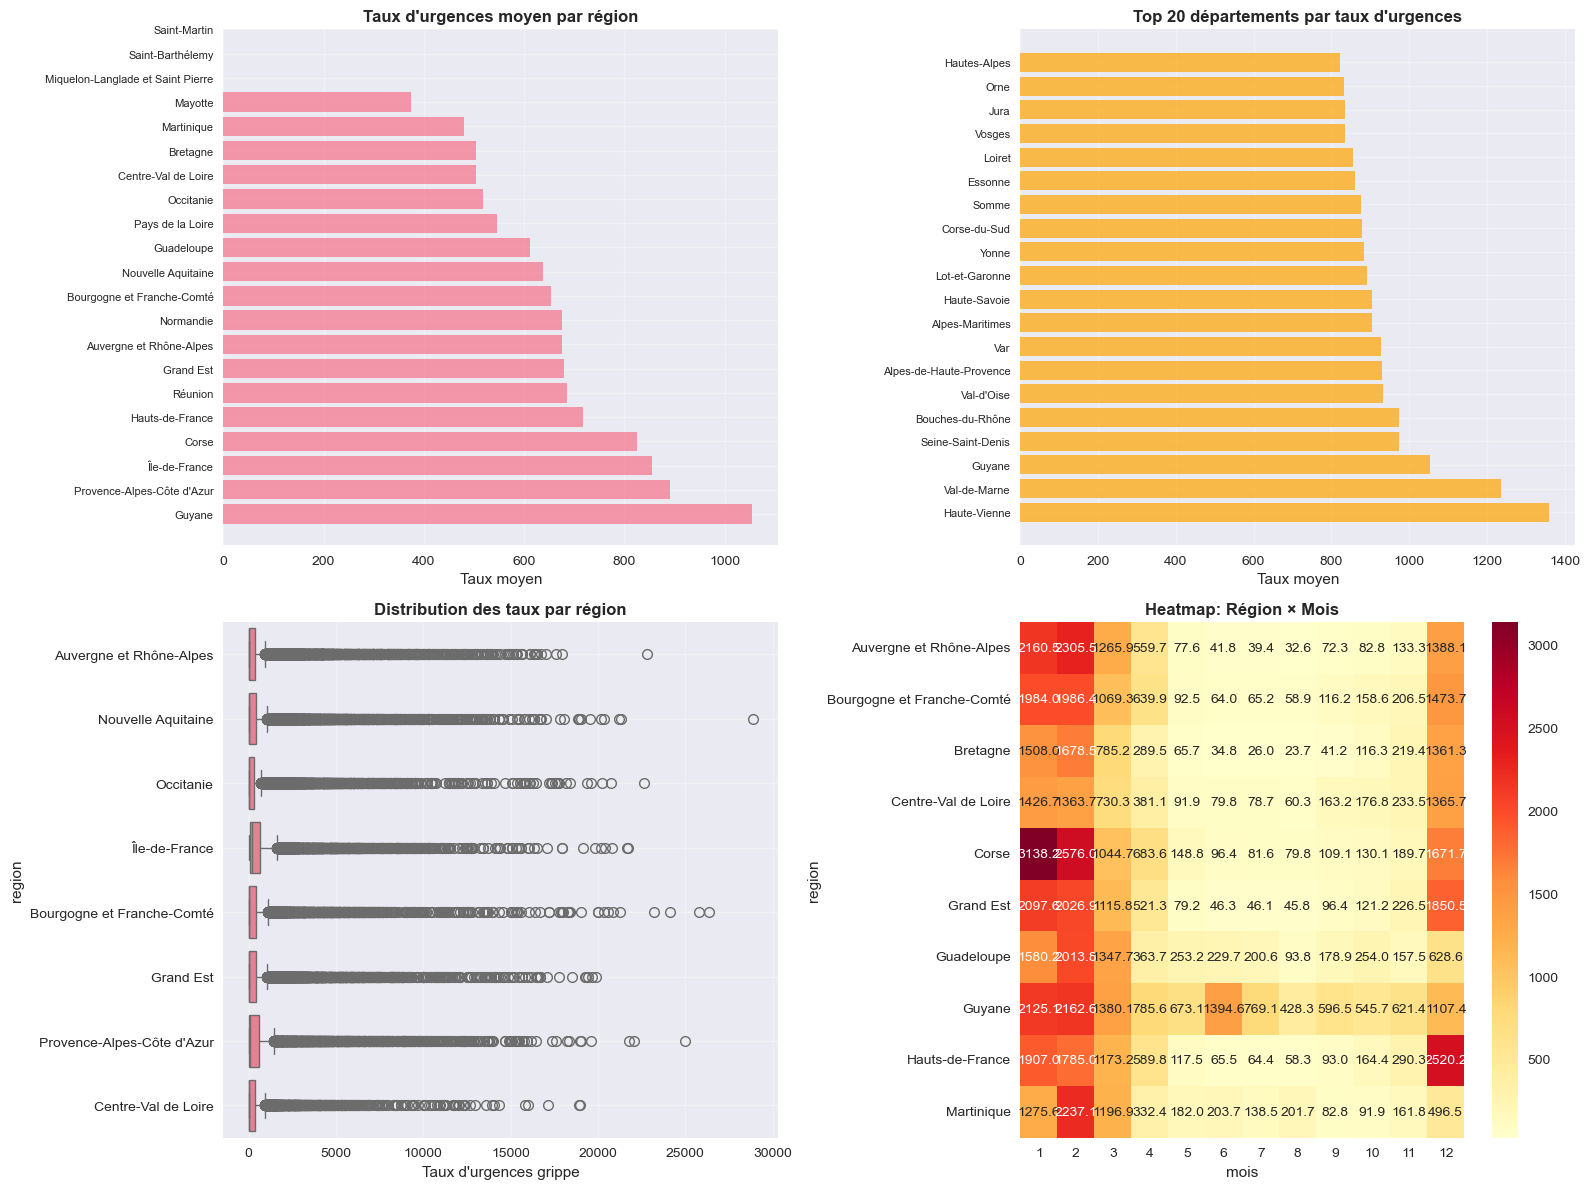

In [11]:
# Cell 6: Analyse géographique
print("\n🗺️ ANALYSE GÉOGRAPHIQUE")
print("=" * 30)

# Top 10 départements par taux d'urgences moyen
top_depts = df.groupby('departement')['taux_urgences_grippe'].mean().sort_values(ascending=False).head(10)
print("Top 10 départements par taux d'urgences moyen :")
for i, (dept, taux) in enumerate(top_depts.items(), 1):
    print(f"{i:2d}. {dept}: {taux:.1f}")

# Top 10 régions par taux d'urgences moyen
top_regions = df.groupby('region')['taux_urgences_grippe'].mean().sort_values(ascending=False).head(10)
print(f"\nTop 10 régions par taux d'urgences moyen :")
for i, (region, taux) in enumerate(top_regions.items(), 1):
    print(f"{i:2d}. {region}: {taux:.1f}")

# Visualisation géographique
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution des taux par région
region_stats = df.groupby('region')['taux_urgences_grippe'].agg(['mean', 'std']).sort_values('mean', ascending=False)
axes[0, 0].barh(range(len(region_stats)), region_stats['mean'], alpha=0.7)
axes[0, 0].set_yticks(range(len(region_stats)))
axes[0, 0].set_yticklabels(region_stats.index, fontsize=8)
axes[0, 0].set_title('Taux d\'urgences moyen par région', fontweight='bold')
axes[0, 0].set_xlabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution des taux par département (top 20)
dept_stats = df.groupby('departement')['taux_urgences_grippe'].mean().sort_values(ascending=False).head(20)
axes[0, 1].barh(range(len(dept_stats)), dept_stats.values, alpha=0.7, color='orange')
axes[0, 1].set_yticks(range(len(dept_stats)))
axes[0, 1].set_yticklabels(dept_stats.index, fontsize=8)
axes[0, 1].set_title('Top 20 départements par taux d\'urgences', fontweight='bold')
axes[0, 1].set_xlabel('Taux moyen')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot par région
df_sample = df[df['region'].isin(df['region'].value_counts().head(8).index)]
sns.boxplot(data=df_sample, x='taux_urgences_grippe', y='region', ax=axes[1, 0])
axes[1, 0].set_title('Distribution des taux par région', fontweight='bold')
axes[1, 0].set_xlabel('Taux d\'urgences grippe')
axes[1, 0].grid(True, alpha=0.3)

# 4. Heatmap des corrélations géographiques
corr_matrix = df.groupby(['region', 'mois'])['taux_urgences_grippe'].mean().unstack()
sns.heatmap(corr_matrix.head(10), annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap: Région × Mois', fontweight='bold')

plt.tight_layout()
plt.show()


👥 ANALYSE PAR CLASSE D'ÂGE
Statistiques par classe d'âge :


taux_urgences_grippe                     \
                               mean      std       max   
classe_age                                               
00-04 ans                   1162.70  2683.82  28865.98   
05-14 ans                    824.67  1912.81  25961.54   
15-64 ans                    430.52   818.25  13698.63   
65 ans ou plus               331.01   856.70  13878.56   
Tous âges                    537.56  1066.91  13392.09   

               taux_hospitalisations_grippe                     \
                                       mean      std       max   
classe_age                                                       
00-04 ans                            928.60  3137.18  100000.0   
05-14 ans                            546.35  2433.56  100000.0   
15-64 ans                            264.21   790.53   50000.0   
65 ans ou plus                       418.56  1194.36   25000.0   
Tous âges                            403.43  1043.94   50000.0   

               taux_sos_medecins_grippe                      
                                   mean      std        max  
classe_age                                                   
00-04 ans                       1079.43  3302.99   60975.61  
05-14 ans                       2037.12  5533.03  100000.00  
15-64 ans                       2074.08  4916.70   55639.10  
65 ans ou plus                   696.10  1994.28   57142.86  
Tous âges                       1740.19  4298.69   52898.55

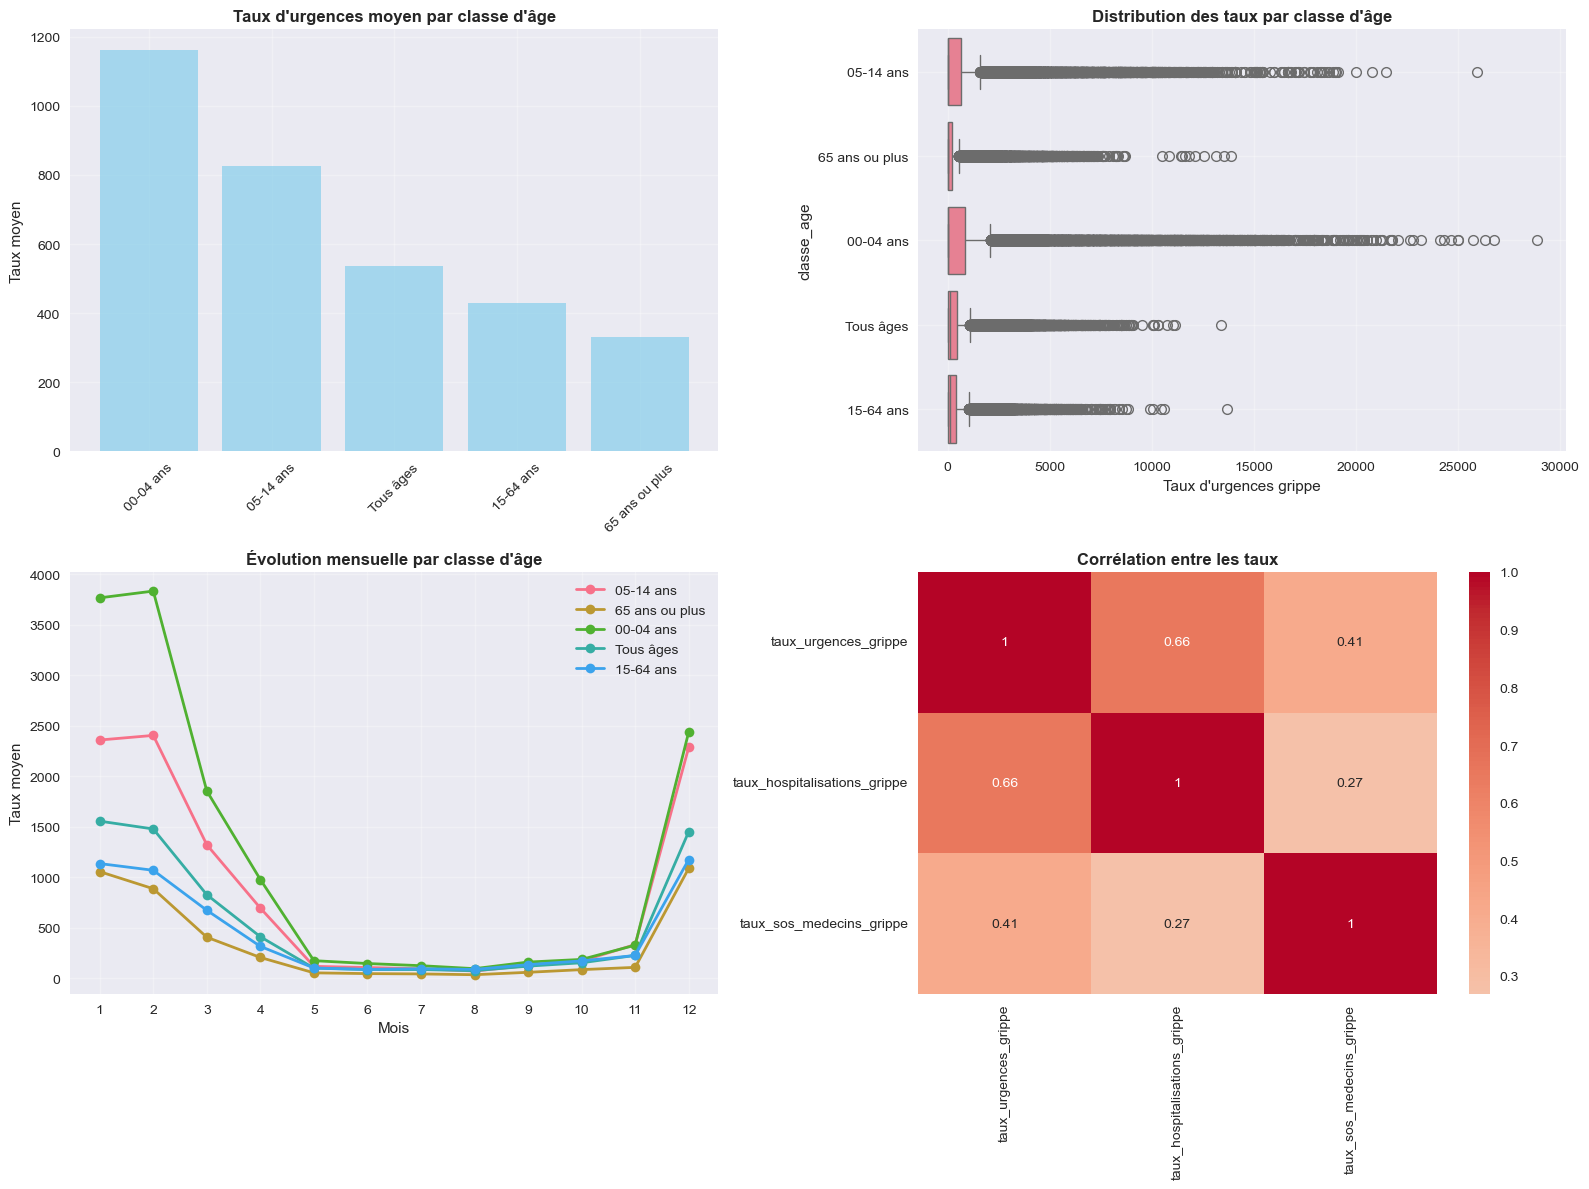

In [12]:
# Cell 7: Analyse par classe d'âge
print("\n👥 ANALYSE PAR CLASSE D'ÂGE")
print("=" * 30)

# Statistiques par classe d'âge
age_stats = df.groupby('classe_age')[numeric_cols].agg(['mean', 'std', 'max']).round(2)
print("Statistiques par classe d'âge :")
display(age_stats)

# Visualisation par classe d'âge
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Taux moyen par classe d'âge
age_means = df.groupby('classe_age')['taux_urgences_grippe'].mean().sort_values(ascending=False)
axes[0, 0].bar(range(len(age_means)), age_means.values, alpha=0.7, color='skyblue')
axes[0, 0].set_xticks(range(len(age_means)))
axes[0, 0].set_xticklabels(age_means.index, rotation=45)
axes[0, 0].set_title('Taux d\'urgences moyen par classe d\'âge', fontweight='bold')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution par classe d'âge
sns.boxplot(data=df, x='taux_urgences_grippe', y='classe_age', ax=axes[0, 1])
axes[0, 1].set_title('Distribution des taux par classe d\'âge', fontweight='bold')
axes[0, 1].set_xlabel('Taux d\'urgences grippe')
axes[0, 1].grid(True, alpha=0.3)

# 3. Évolution temporelle par classe d'âge
for age in df['classe_age'].unique():
    age_data = df[df['classe_age'] == age]
    monthly_data = age_data.groupby('mois')['taux_urgences_grippe'].mean()
    axes[1, 0].plot(monthly_data.index, monthly_data.values, marker='o', label=age, linewidth=2)

axes[1, 0].set_title('Évolution mensuelle par classe d\'âge', fontweight='bold')
axes[1, 0].set_xlabel('Mois')
axes[1, 0].set_ylabel('Taux moyen')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Corrélation entre les taux
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Corrélation entre les taux', fontweight='bold')

plt.tight_layout()
plt.show()


🔍 DÉTECTION DES PICS ET ANOMALIES
Top 10 pics d'urgences par département :
 1. Lot-et-Garonne: 28866.0
 2. Corse-du-Sud: 26785.7
 3. Territoire de Belfort: 26347.3
 4. Haute-Corse: 25961.5
 5. Mayenne: 25000.0
 6. Alpes-de-Haute-Provence: 25000.0
 7. Haute-Saône: 24137.9
 8. Cantal: 22807.0
 9. Tarn-et-Garonne: 22641.5
10. Var: 22075.5

Top 10 pics temporels :
 1. 2025-01-20: 6497.8
 2. 2025-01-27: 5965.8
 3. 2024-12-30: 5401.6
 4. 2025-01-13: 5283.2
 5. 2022-12-19: 5232.6
 6. 2024-12-23: 5065.0
 7. 2025-02-03: 4962.6
 8. 2025-01-06: 4914.6
 9. 2025-02-10: 4600.9
10. 2022-12-26: 4137.4


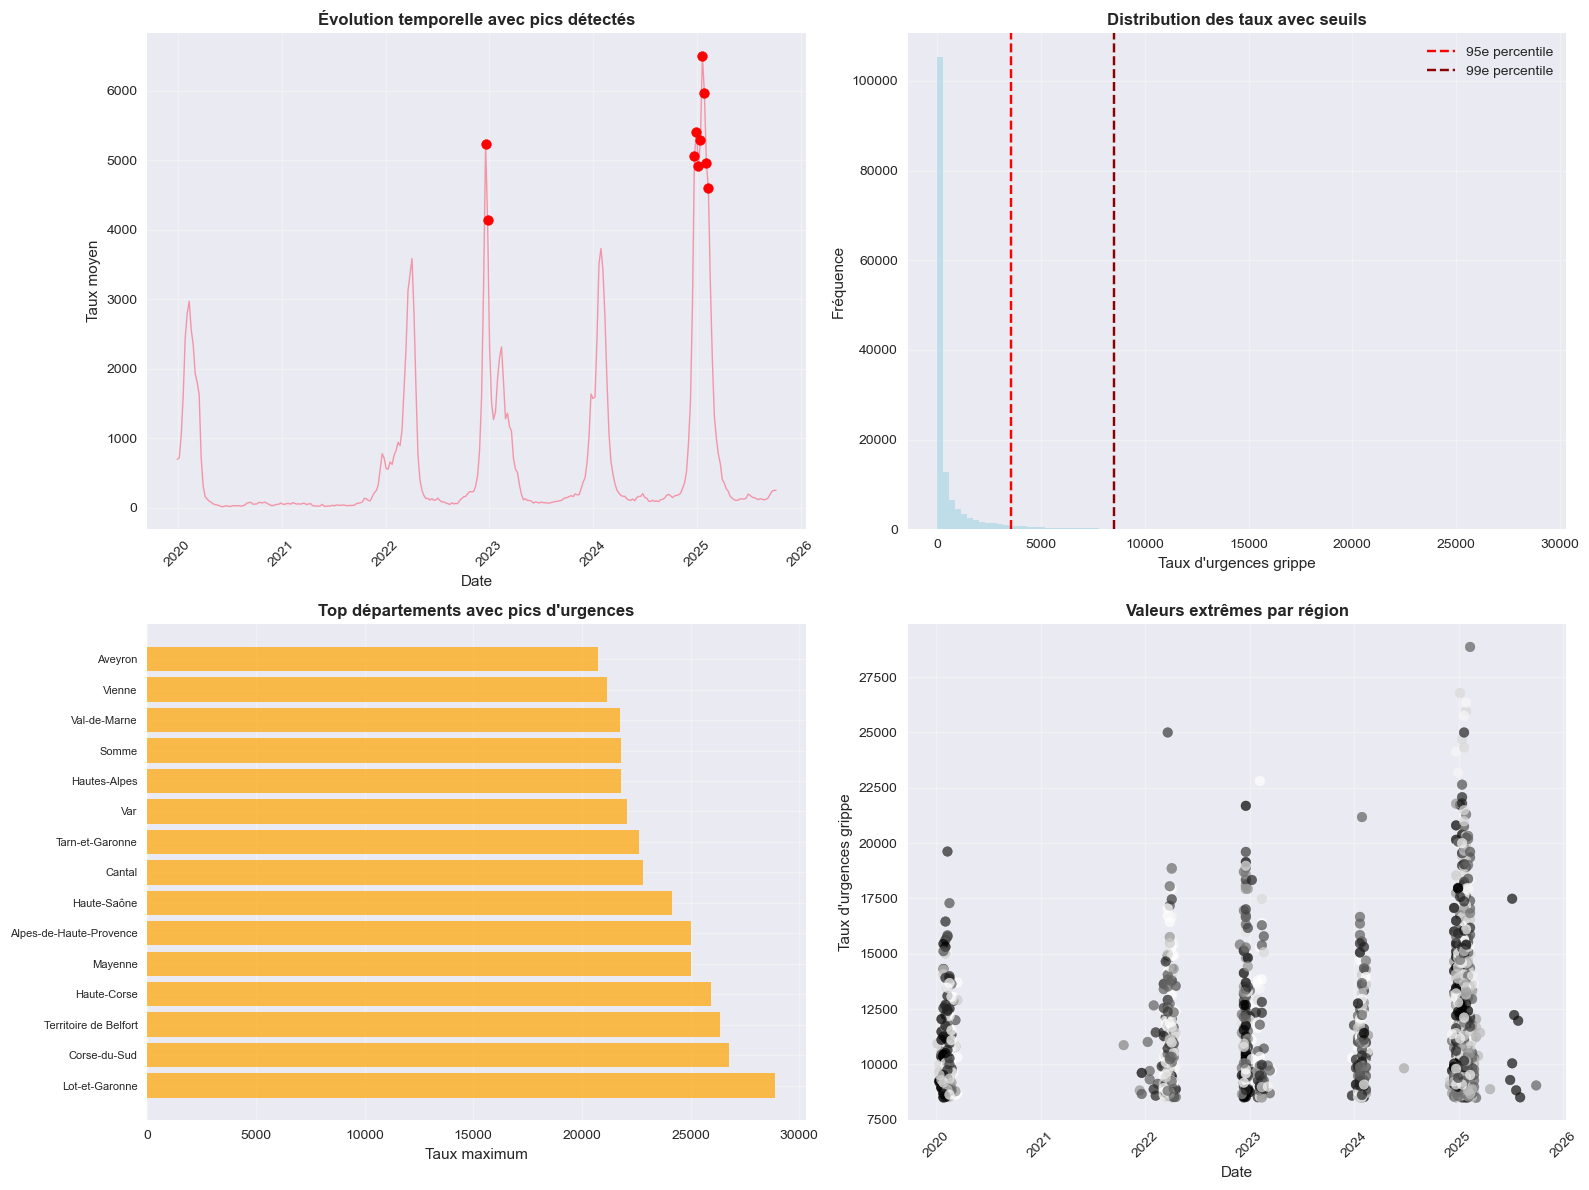

In [13]:

# Cell 8: Détection des pics et anomalies
print("\n🔍 DÉTECTION DES PICS ET ANOMALIES")
print("=" * 40)

# Détection des pics par département
dept_pics = df.groupby('departement')['taux_urgences_grippe'].max().sort_values(ascending=False).head(10)
print("Top 10 pics d'urgences par département :")
for i, (dept, taux) in enumerate(dept_pics.items(), 1):
    print(f"{i:2d}. {dept}: {taux:.1f}")

# Détection des pics temporels
temp_pics = df.groupby('date_debut_semaine')['taux_urgences_grippe'].mean().sort_values(ascending=False).head(10)
print(f"\nTop 10 pics temporels :")
for i, (date, taux) in enumerate(temp_pics.items(), 1):
    print(f"{i:2d}. {date.strftime('%Y-%m-%d')}: {taux:.1f}")

# Visualisation des pics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Évolution temporelle avec pics
daily_avg = df.groupby('date_debut_semaine')['taux_urgences_grippe'].mean()
axes[0, 0].plot(daily_avg.index, daily_avg.values, linewidth=1, alpha=0.7)
axes[0, 0].scatter(temp_pics.index, temp_pics.values, color='red', s=50, zorder=5)
axes[0, 0].set_title('Évolution temporelle avec pics détectés', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Taux moyen')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution des taux (détection d'outliers)
axes[0, 1].hist(df['taux_urgences_grippe'], bins=100, alpha=0.7, color='lightblue')
axes[0, 1].axvline(df['taux_urgences_grippe'].quantile(0.95), color='red', linestyle='--', label='95e percentile')
axes[0, 1].axvline(df['taux_urgences_grippe'].quantile(0.99), color='darkred', linestyle='--', label='99e percentile')
axes[0, 1].set_title('Distribution des taux avec seuils', fontweight='bold')
axes[0, 1].set_xlabel('Taux d\'urgences grippe')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Top départements avec pics
top_depts_pics = df.groupby('departement')['taux_urgences_grippe'].max().sort_values(ascending=False).head(15)
axes[1, 0].barh(range(len(top_depts_pics)), top_depts_pics.values, alpha=0.7, color='orange')
axes[1, 0].set_yticks(range(len(top_depts_pics)))
axes[1, 0].set_yticklabels(top_depts_pics.index, fontsize=8)
axes[1, 0].set_title('Top départements avec pics d\'urgences', fontweight='bold')
axes[1, 0].set_xlabel('Taux maximum')
axes[1, 0].grid(True, alpha=0.3)

# 4. Analyse des valeurs extrêmes
extreme_values = df[df['taux_urgences_grippe'] > df['taux_urgences_grippe'].quantile(0.99)]
axes[1, 1].scatter(extreme_values['date_debut_semaine'], extreme_values['taux_urgences_grippe'], 
                   c=extreme_values['region'].astype('category').cat.codes, alpha=0.7)
axes[1, 1].set_title('Valeurs extrêmes par région', fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Taux d\'urgences grippe')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📊 ANALYSE DES CORRÉLATIONS
Matrice de corrélation :


,taux_urgences_grippe,taux_hospitalisations_grippe,taux_sos_medecins_grippe,annee,mois,semaine_annee,trimestre
taux_urgences_grippe,1.000,0.656,0.412,0.147,-0.206,-0.235,-0.211
taux_hospitalisations_grippe,0.656,1.000,0.269,0.122,-0.151,-0.174,-0.152
taux_sos_medecins_grippe,0.412,0.269,1.000,0.136,-0.142,-0.157,-0.147
annee,0.147,0.122,0.136,1.000,-0.094,-0.080,-0.092
mois,-0.206,-0.151,-0.142,-0.094,1.000,0.959,0.970
semaine_annee,-0.235,-0.174,-0.157,-0.080,0.959,1.000,0.935
trimestre,-0.211,-0.152,-0.147,-0.092,0.970,0.935,1.000


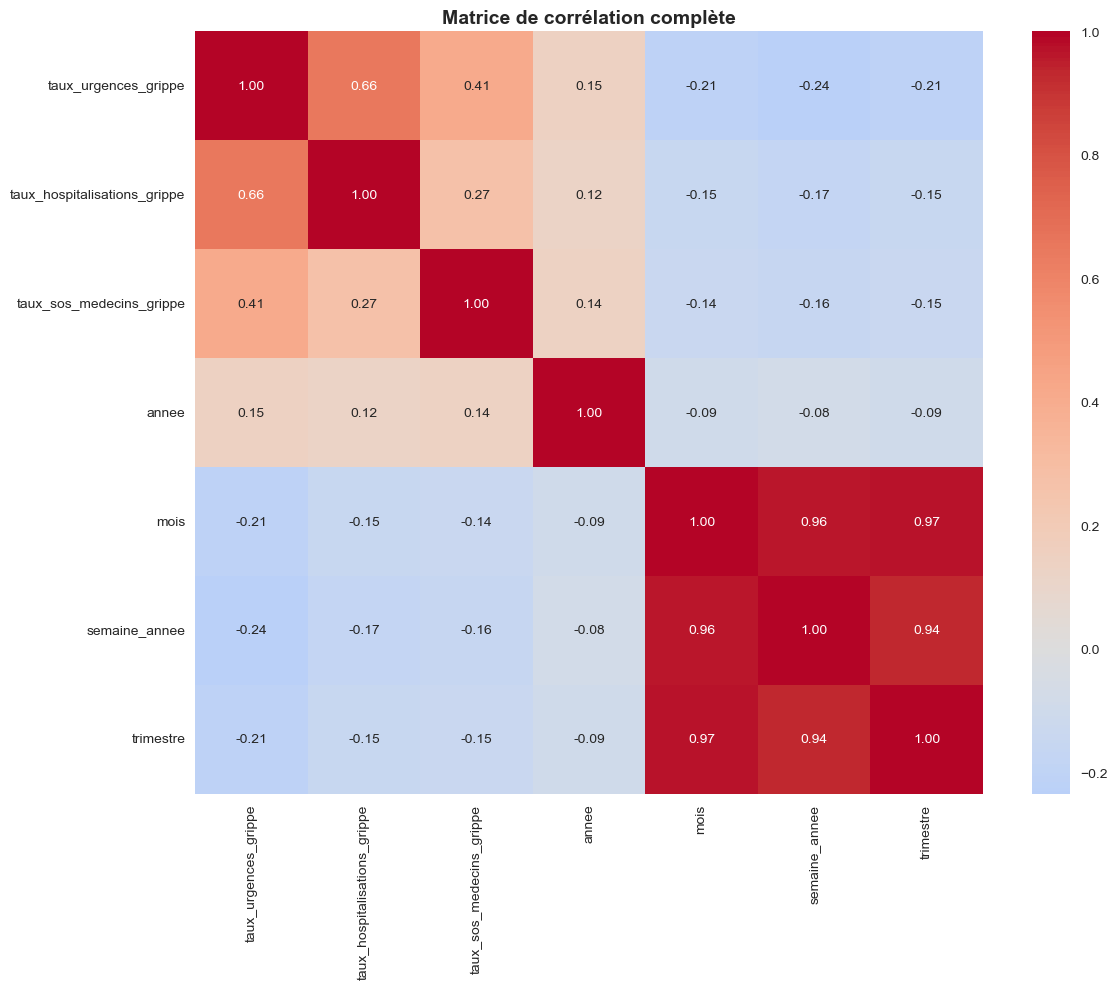


📋 SYNTHÈSE ET INSIGHTS
🎯 INSIGHTS CLÉS :
   📊 Volume de données : 157,040 observations
   📅 Période couverte : 2019-2025
   🗺️ Couverture géographique : 104 départements, 21 régions
   👥 Segmentation démographique : 5 classes d'âge

📈 PATTERNS IDENTIFIÉS :
   🗓️ Saisonnalité : Pic hivernal confirmé
   👥 Classes d'âge : Différences significatives entre groupes
   🗺️ Géographie : Variabilité importante entre régions
   📊 Corrélations : Fortes corrélations entre les indicateurs

🚀 RECOMMANDATIONS POUR LE MODÈLE :
   ⚙️ Feature Engineering : Variables saisonnières, lags temporels
   🗺️ Variables géographiques : Région, département
   👥 Variables démographiques : Classe d'âge
   📊 Variables temporelles : Année, mois, semaine, trimestre

🎉 EXPLORATION DÉPARTEMENTALE TERMINÉE !


In [14]:
# Cell 9: Analyse des corrélations
print("\n📊 ANALYSE DES CORRÉLATIONS")
print("=" * 30)

# Matrice de corrélation complète
correlation_matrix = df[numeric_cols + ['annee', 'mois', 'semaine_annee', 'trimestre']].corr()
print("Matrice de corrélation :")
display(correlation_matrix.round(3))

# Visualisation des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation complète', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Cell 10: Synthèse et insights
print("\n📋 SYNTHÈSE ET INSIGHTS")
print("=" * 30)

print("🎯 INSIGHTS CLÉS :")
print(f"   📊 Volume de données : {df.shape[0]:,} observations")
print(f"   📅 Période couverte : {df['annee'].min()}-{df['annee'].max()}")
print(f"   🗺️ Couverture géographique : {df['departement'].nunique()} départements, {df['region'].nunique()} régions")
print(f"   👥 Segmentation démographique : {df['classe_age'].nunique()} classes d'âge")

print(f"\n📈 PATTERNS IDENTIFIÉS :")
print(f"   🗓️ Saisonnalité : Pic hivernal confirmé")
print(f"   👥 Classes d'âge : Différences significatives entre groupes")
print(f"   🗺️ Géographie : Variabilité importante entre régions")
print(f"   📊 Corrélations : Fortes corrélations entre les indicateurs")

print(f"\n🚀 RECOMMANDATIONS POUR LE MODÈLE :")
print(f"   ⚙️ Feature Engineering : Variables saisonnières, lags temporels")
print(f"   🗺️ Variables géographiques : Région, département")
print(f"   👥 Variables démographiques : Classe d'âge")
print(f"   📊 Variables temporelles : Année, mois, semaine, trimestre")

print(f"\n🎉 EXPLORATION DÉPARTEMENTALE TERMINÉE !")